In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## 1.1 Soybean USDA lines

In [2]:
USDA_Soy_lines=pd.read_excel(open('Soy_USDA_Lines_descritpion.xlsx', 'rb'), sheet_name='Sheet1', skiprows=[0])  
USDA_Soy_lines.rename(columns={'PI':'GEName', 'Subcollection*':'Species','Country*':'Country','MG*':'MG','Similarity >99.9% to other accessions':'>99.9% similarity to other lines','Landrace or N. Am. cultivar used for analysis':'Landrace or N. Am. cultivar','Seed weight*':'Seed weight'}, inplace=True)

USDA_Soy_lines.head()

,GEName,Species,Country,MG,>99.9% similarity to other lines,Landrace or N. Am. cultivar,Seed weight
0,FC001547,G. max,China,II,NaN,Landrace,NaN
1,FC003654_1,G. max,China,IV,NaN,Landrace,NaN
2,FC003659,G. max,China,VI,NaN,Landrace,8.6
3,FC030685,G. max,Japan,ZZ,NaN,Landrace,31.6
4,FC031571,G. max,China,III,NaN,Landrace,NaN


In [3]:
len(USDA_Soy_lines.GEName)

19649

In [4]:
len(USDA_Soy_lines.Country.unique())

91

In [5]:
# Since the follwoing countries are not exist, I am replacing them. 'Yugoslavia' with 'Montenegro'; 'Eastern Europe' with 'Hungary'
USDA_Soy_lines["Country"].replace({'Yugoslavia':'Montenegro', 'Eastern Europe':'Hungary','Zaire':'Democratic Republic of the Congo','Former Soviet Union':'Ukraine'}, inplace=True)
USDA_Soy_lines.head(5)

,GEName,Species,Country,MG,>99.9% similarity to other lines,Landrace or N. Am. cultivar,Seed weight
0,FC001547,G. max,China,II,NaN,Landrace,NaN
1,FC003654_1,G. max,China,IV,NaN,Landrace,NaN
2,FC003659,G. max,China,VI,NaN,Landrace,8.6
3,FC030685,G. max,Japan,ZZ,NaN,Landrace,31.6
4,FC031571,G. max,China,III,NaN,Landrace,NaN


In [6]:
# check proportion of GE's with >99% similarity to other lines for differnet species
proportion_species=USDA_Soy_lines.groupby('Species').count()
counts=proportion_species[['GEName','>99.9% similarity to other lines']]
counts['Proportion of identical accessions']=(proportion_species['>99.9% similarity to other lines']/proportion_species['GEName'])*100
data=counts.reset_index()
data

C:\Users\gellima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Species,GEName,>99.9% similarity to other lines,Proportion of identical accessions
0,G. Soja,1168,362,30.993151
1,G. max,18480,4299,23.262987


In [7]:
similarity=data[['Species','Proportion of identical accessions']]
similarity['Proportion of identical accessions'].round(2)

0    30.99
1    23.26
Name: Proportion of identical accessions, dtype: float64

In [8]:
Similarity=USDA_Soy_lines[['GEName','Species','Country','MG','>99.9% similarity to other lines']]
Similarity.dropna().head()

,GEName,Species,Country,MG,>99.9% similarity to other lines
5958,FC002108,G. max,China,III,Y
5962,FC003654N,G. max,China,III,Y
5964,FC004002B,G. max,unknown,III,Y
5966,FC004007A,G. max,unknown,II,Y
5968,FC019976,G. max,Japan,II,Y


In [9]:
Similarity.groupby('Species').count()

,GEName,Country,MG,>99.9% similarity to other lines
Species,,,,
G. Soja,1168,1168,1107,362
G. max,18480,18480,18442,4299


Text(0, 0.5, 'Number of GEs')

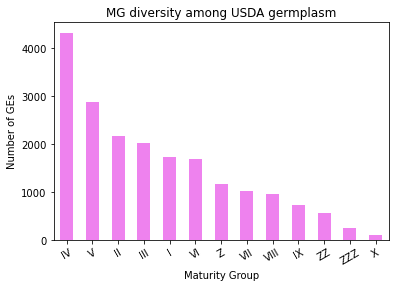

In [10]:
USDA_Soy_lines['MG'].value_counts().plot.bar(color='violet')
plt.title('MG diversity among USDA germplasm')
plt.xlabel('Maturity Group')
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel('Number of GEs')

There are 18480 G. max & 1168 G. Soja lines


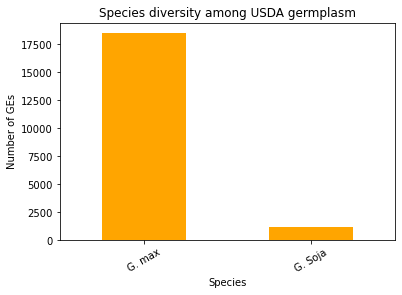

In [11]:
USDA_Soy_lines['Species'].value_counts().plot.bar(color='orange')
plt.title('Species diversity among USDA germplasm')
plt.xlabel('Species')
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel('Number of GEs')

print("There are 18480 G. max & 1168 G. Soja lines")

Text(0, 0.5, 'Number of GEs')

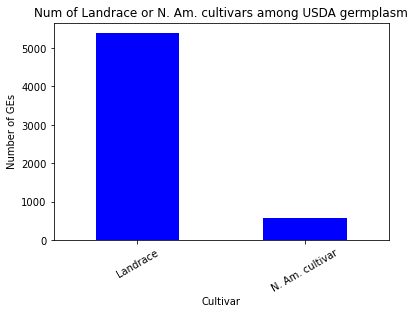

In [12]:
USDA_Soy_lines['Landrace or N. Am. cultivar'].value_counts().plot.bar(color='blue')
plt.title('Num of Landrace or N. Am. cultivars among USDA germplasm')
plt.xlabel('Cultivar')
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel('Number of GEs')

In [13]:
per_country=USDA_Soy_lines['Country'].value_counts()
per_country.head(60)

China                 6376
South Korea           3735
Japan                 3228
United States         1582
Russia                 907
Vietnam                637
Indonesia              405
India                  295
North Korea            224
Germany                213
Brazil                 177
Moldova                164
France                 158
unknown                148
Taiwan                 110
Nepal                  108
Russian Federation     108
Hungary                 80
Montenegro              74
Canada                  69
Ukraine                 65
Sweden                  64
Poland                  55
Romania                 47
Thailand                45
South Africa            39
Belgium                 39
Georgia                 39
Bulgaria                36
Uganda                  30
Netherlands             30
Malaysia                28
Philippines             28
Argentina               23
Pakistan                18
Tanzania                17
Suriname                14
Z

Text(0.5, 1.0, 'GEs from top 20 countrys')

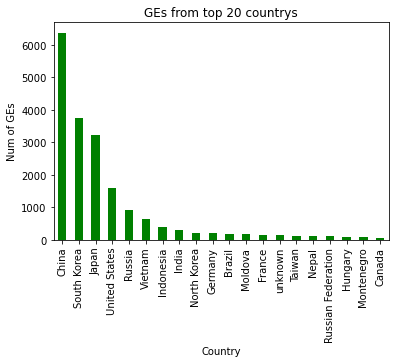

In [14]:
per_country.head(20).plot.bar(color='Green')
plt.xlabel('Country')
plt.ylabel('Num of GEs')
plt.title('GEs from top 20 countrys')

In [15]:
Lines_per_country=pd.DataFrame(per_country).reset_index()
Lines_per_country.columns=['Country', 'Num_of_Lines']
Lines_per_country.head()

,Country,Num_of_Lines
0,China,6376
1,South Korea,3735
2,Japan,3228
3,United States,1582
4,Russia,907


In [16]:
countries_list=[]
for index, row in Lines_per_country.iterrows():
    countries_list.append(row['Country'])
    #print(row['Country'])
    
print(countries_list)

['China', 'South Korea', 'Japan', 'United States', 'Russia', 'Vietnam', 'Indonesia', 'India', 'North Korea', 'Germany', 'Brazil', 'Moldova', 'France', 'unknown', 'Taiwan', 'Nepal', 'Russian Federation', 'Hungary', 'Montenegro', 'Canada', 'Ukraine', 'Sweden', 'Poland', 'Romania', 'Thailand', 'South Africa', 'Belgium', 'Georgia', 'Bulgaria', 'Uganda', 'Netherlands', 'Malaysia', 'Philippines', 'Argentina', 'Pakistan', 'Tanzania', 'Suriname', 'Zimbabwe', 'Lithuania', 'Algeria', 'Australia', 'Nigeria', 'Peru', 'Israel', 'Venezuela', 'Morocco', 'Kazakhstan', 'Bhutan', 'Mozambique', 'Uzbekistan', 'Zambia', 'Myanmar', 'Czech Republic', 'Colombia', 'Turkey', 'Austria', 'Uruguay', 'Angola', 'Sudan', 'Kenya', 'Burundi', 'Afghanistan', 'Portugal', 'Democratic Republic of the Congo', 'United Kingdom', 'Kyrgyzstan', 'Latvia', 'Central African Republic', 'El Salvador', 'Papua New Guinea', 'Costa Rica', 'Mexico', 'Guatemala', 'Cameroon', 'Turkmenistan', 'Switzerland', 'Iran', 'Ghana', 'Bosnia and Herz

In [17]:
print(len(countries_list))

88


# The geographic distribution of the accessions used in this study

## Conversion to Alpha 2 codes and Continents

Country names are converted to alpha 2 country codes. For example, United States to US. 
Python’s pycountry-convert package is used to handle the conversion.

In [23]:
#installation
# pip install pycountry-convert or

#conda install -c conda-forge/label/cf201901 pycountry

In [24]:
import pycountry_convert as pc
country_code=[]
continent=[]
for i in countries_list:
    #print(i)
    if i !='unknown':        
        cn_code = pc.country_name_to_country_alpha2(i, cn_name_format="default")
        country_code.append(cn_code)
        
        con_name = pc.country_alpha2_to_continent_code(cn_code)
        continent.append(con_name)
            
    else:
        cn_code='unknown'
        con_name='unknown'
        
        country_code.append(cn_code)
        continent.append(con_name)
Lines_per_country['Country_code'] = country_code
Lines_per_country['Continent'] = continent

In [25]:
Lines_per_country.head()

,Country,Num_of_Lines,Country_code,Continent
0,China,6376,CN,AS
1,South Korea,3735,KR,AS
2,Japan,3228,JP,AS
3,United States,1582,US,NA
4,Russia,907,RU,EU


## Get longitude and latitude

In [26]:
#installation
# pip install geopy or 
#conda install -c conda-forge/label/gcc7 geopy

In [27]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
   
# declare an empty list to store latitude and longitude of values 
longitude = []
latitude = []
   
# function to find the coordinate of a given country 
def findGeocode(Country):
       
    # try and catch is used to overcome the exception thrown by geolocator using geocodertimedout  
    try:
          
        # Specify the user_agent as your app name it should not be none
        geolocator = Nominatim(user_agent="your_app_name")
        
        return geolocator.geocode(Country)
      
    except GeocoderTimedOut: 
        return findGeocode(Country)    
  
# each value from Country column will be fetched and sent to function find_geocode   
for i in countries_list:
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # coordinates returned from function is stored into two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
        # if coordinate for a city not found, insert "NaN" indicating missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)
#Showing the output produced as dataframe, now add this column to dataframe
Lines_per_country["Longitude"] = longitude
Lines_per_country["Latitude"] = latitude

In [28]:
Lines_per_country.head()

,Country,Num_of_Lines,Country_code,Continent,Longitude,Latitude
0,China,6376,CN,AS,104.999927,35.000074
1,South Korea,3735,KR,AS,127.696119,36.638392
2,Japan,3228,JP,AS,139.239418,36.574844
3,United States,1582,US,NA,-100.445882,39.783730
4,Russia,907,RU,EU,97.745306,64.686314


## Create a world map

In [29]:
#installation
# pip install folium or conda install -c conda-forge/label/cf202003 folium

In [30]:
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(Lines_per_country)):
        lat = Lines_per_country.iloc[i]['Latitude']
        long = Lines_per_country.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(Lines_per_country.iloc[i]['Country'],
                                   Lines_per_country.iloc[i]['Num_of_Lines']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

## Summary: 
Soybean USDA lines dataset contains 19649 entries collected from 91 countries. But, some of the countries are renamed. For example: Yugoslavia is changed to Montenegro, Eastern Europe with Hungary, Zaire with Democratic Republic of the Congo and Former Soviet Union with Ukraine. This resulted in collection from 89 counties. Top five countries are: China, South Korea, Japan, United States and Russia.
There is great diversity exist among USDA lines: 
•of these 19649 lines, entries from G.max species are higher (18480) vs G.soja (1168). Among these, 31% of G.max and 23.2% G.soja entries had >99% similarity with other entries. 
•Diversity across maturity groups is there, more entries are from early to mid-maturity groups (I to VI).
•More landraces are there relative to N.Am.cultivars.
